In [62]:
# Importing the necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [63]:
# Establising the connection using sqlite database
sqlite_file = 'lahman_1871-2022.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"

team_salaries = pd.read_sql(salary_query, conn)
team_salaries.head()

,yearID,teamID,total_payroll
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0


In [64]:
# check any null values
team_salaries.isnull().sum()

yearID           0
teamID           0
total_payroll    0
dtype: int64

In [65]:
# Execute query and store in pandas DataFrame

temp_query = "select * from Managers"
temp = pd.read_sql(temp_query, conn)

In [66]:
# Check for null values in the 'temp' DataFrame
temp.isnull().sum()

playerID    0
yearID      0
teamID      0
lgID        0
inseason    0
G           0
W           0
L           0
rank        0
plyrMgr     0
dtype: int64

In [67]:
# SQL query to calculate total games, wins, and win percentage by team and year

win_query = "select teamID, yearID, sum(G) as total_game, sum(W) as total_win, sum(W)*1.0/sum(G)*100 as percentage_win FROM Managers Group BY teamID, yearID"

In [68]:
win_table = pd.read_sql(win_query, conn)

In [69]:
win_table

,teamID,yearID,total_game,total_win,percentage_win
0,BS1,1871,31,20,64.516129
1,CH1,1871,28,19,67.857143
2,CL1,1871,29,10,34.482759
3,FW1,1871,19,7,36.842105
4,NY2,1871,33,16,48.484848
...,...,...,...,...,...
3010,SLN,2022,162,93,57.407407
3011,TBA,2022,162,86,53.086420
3012,TEX,2022,162,68,41.975309
3013,TOR,2022,162,92,56.790123


In [70]:
# Merge 'team_salaries' and 'win_table' DataFrames on 'teamID' and 'yearID'

result = pd.merge(team_salaries, win_table, on=["teamID", "yearID"])

In [71]:
result.isnull().sum()

yearID            0
teamID            0
total_payroll     0
total_game        0
total_win         0
percentage_win    0
dtype: int64

In [72]:
result

,yearID,teamID,total_payroll,total_game,total_win,percentage_win
0,1985,ATL,14807000.0,162,66,40.740741
1,1985,BAL,11560712.0,161,83,51.552795
2,1985,BOS,10897560.0,163,81,49.693252
3,1985,CAL,14427894.0,162,90,55.555556
4,1985,CHA,9846178.0,163,85,52.147239
...,...,...,...,...,...,...
913,2016,SLN,143053500.0,162,86,53.086420
914,2016,TBA,57097310.0,162,68,41.975309
915,2016,TEX,176038723.0,162,95,58.641975
916,2016,TOR,138701700.0,162,89,54.938272


In [73]:
# Filter data for years between 1990 and 2014

a = result[result.yearID > 1989]
result_1990_2014 = a[a.yearID < 2015]

# Alternative filtering method using lambda function

# or

# result_1990_2014 = result.loc[lambda df: (df.yearID > 1989) & (df.yearID < 2015), :]

In [74]:
result_1990_2014.reset_index(inplace=True)

In [75]:
result_1990_2014

,index,yearID,teamID,total_payroll,total_game,total_win,percentage_win
0,130,1990,ATL,14555501.0,162,65,40.123457
1,131,1990,BAL,9680084.0,162,76,46.913580
2,132,1990,BOS,20558333.0,162,88,54.320988
3,133,1990,CAL,21720000.0,162,80,49.382716
4,134,1990,CHA,9491500.0,162,94,58.024691
...,...,...,...,...,...,...,...
723,853,2014,SLN,120693000.0,162,90,55.555556
724,854,2014,TBA,72689100.0,162,77,47.530864
725,855,2014,TEX,112255059.0,162,67,41.358025
726,856,2014,TOR,109920100.0,162,83,51.234568


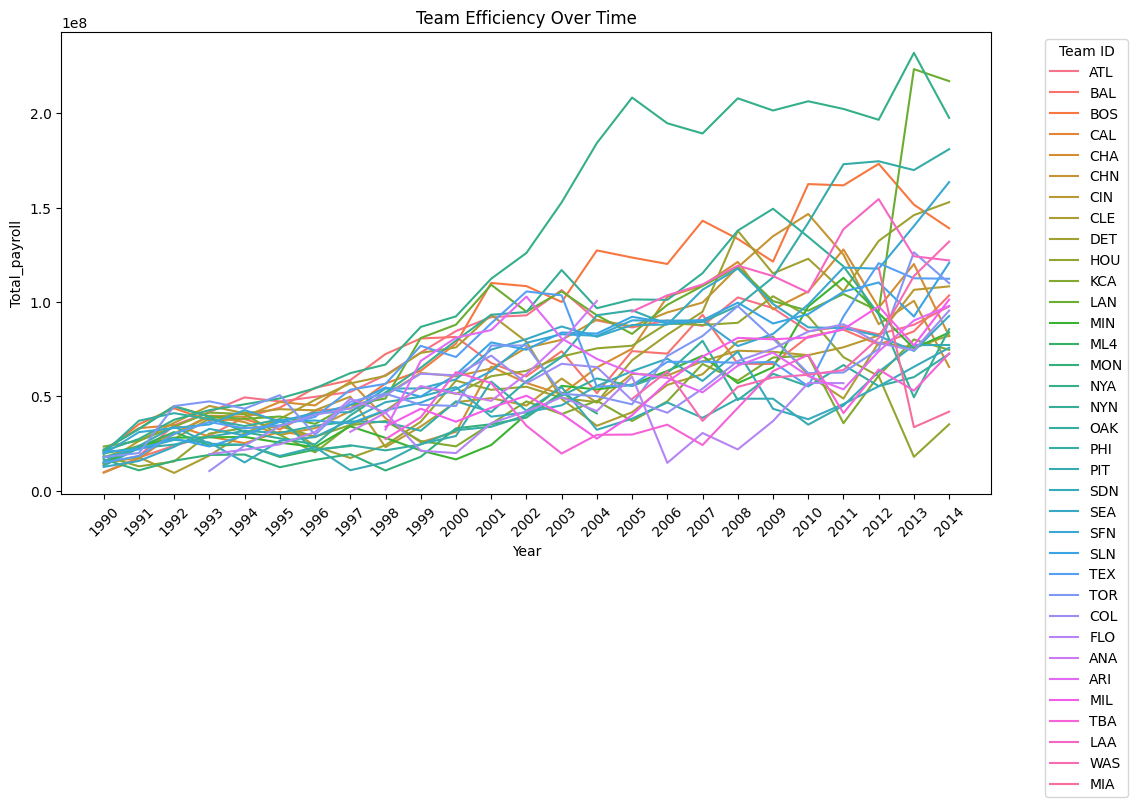

In [76]:
# Plotting total payroll over time for each team

plt.figure(figsize=(12, 6))
sns.lineplot(x='yearID', y='total_payroll', data=result_1990_2014, hue='teamID')
plt.xlabel('Year')
plt.ylabel('Total_payroll')
plt.title('Team Efficiency Over Time')
plt.xticks(result_1990_2014.yearID.unique(), rotation=45)
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [77]:
# From above graph, Not all teams start from the year 1990 so that teams should remove from our datasets in order to consistancy of teams over given time period.


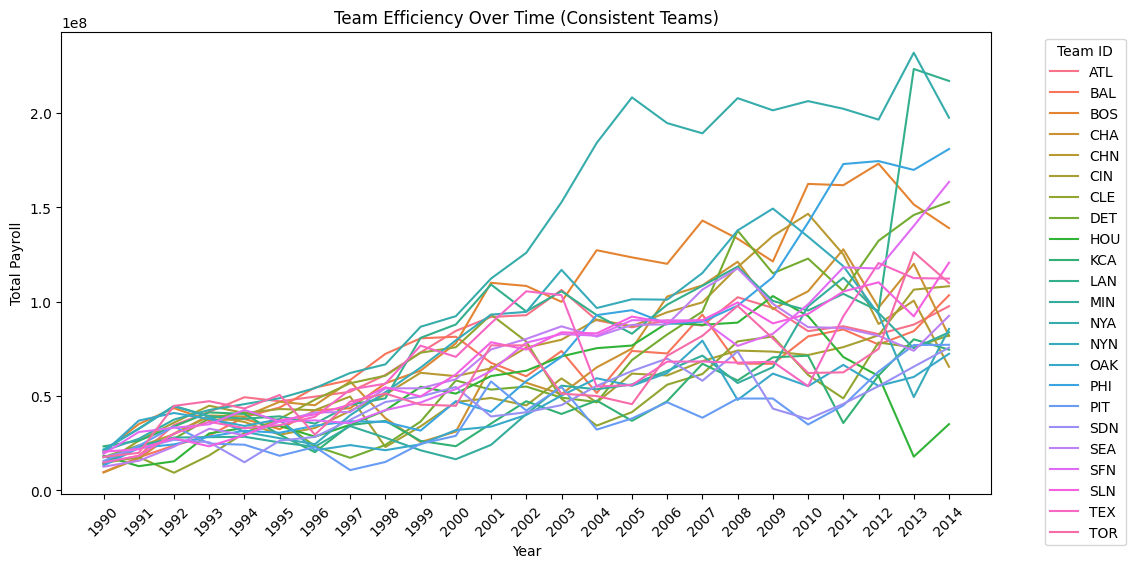

Inconsistent Teams: ['CAL', 'ML4', 'MON', 'COL', 'FLO', 'ANA', 'ARI', 'MIL', 'TBA', 'LAA', 'WAS', 'MIA']


In [78]:
# Plots of payroll over Time but with consistent datasets and collect and the inconsistent teams with respect to the time period

inconsistent_teams = []  # Store inconsistent teams
consistent_teams_data = []  # Store data for consistent teams

for team in result_1990_2014['teamID'].unique():
    team_data = result_1990_2014[result_1990_2014['teamID'] == team]
    if len(team_data['yearID'].unique()) == len(result_1990_2014['yearID'].unique()):
        consistent_teams_data.append(team_data)  # Append if team data consistent across all years
    else:
        inconsistent_teams.append(team)

consistent_teams_df = pd.concat(consistent_teams_data)  # Combine data for consistent teams


plt.figure(figsize=(12, 6))
sns.lineplot(x='yearID', y='total_payroll', data=consistent_teams_df, hue='teamID')
plt.xlabel('Year')
plt.ylabel('Total Payroll')
plt.title('Team Efficiency Over Time (Consistent Teams)')
plt.xticks(consistent_teams_df['yearID'].unique(), rotation=45)
plt.legend(title='Team ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Inconsistent Teams:", inconsistent_teams)

In [79]:
# Part 2 Que-1.
# Answers
# 1. From above graph we can say that Average total_payroll of teams had been increasing with time.
# 2. We can observe that the total payroll for the team “NYA” almost doubled over the span of 2000 to 2005.

In [80]:
# Make instance for problem 3 for easy interpretation
new_df=result_1990_2014.loc[:, ["yearID", "total_payroll", "percentage_win"]]
new_df = new_df.groupby("yearID").mean()
new_df.reset_index(inplace=True)

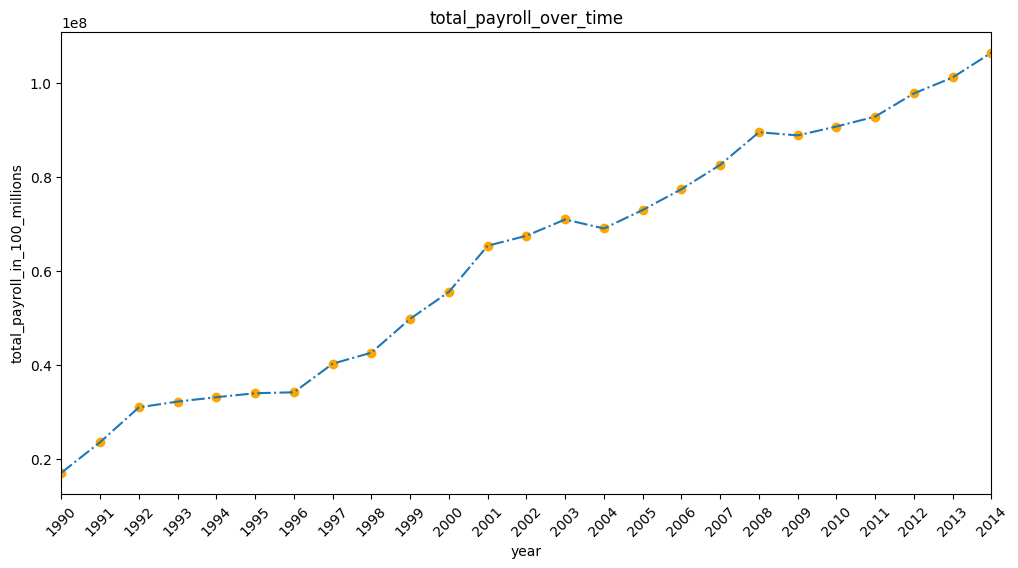

In [81]:
# Part 2, Problem 3
# Here the graph that withstands with the above statement 1.

plt.figure(figsize=(12,6))
plt.plot(new_df["yearID"], new_df["total_payroll"],'-.')
plt.scatter(new_df["yearID"], new_df["total_payroll"],color='orange')
plt.xlabel("year")
plt.ylabel("total_payroll_in_100_millions")
plt.title("total_payroll_over_time")
plt.xticks(new_df["yearID"],rotation=45)
plt.xlim(1990,2014)
plt.show()



In [82]:
# Make a new df that contains consistant teams data

bool_list = []
for x in result_1990_2014.teamID:
    if x not in inconsistent_teams:
        bool_list.append(True)
    else:
        bool_list.append(False)

final_result = result_1990_2014[bool_list]
final_result.reset_index(inplace=True)


In [83]:
# divide the time periods into 5 parts and groupby teamID
bin1 = final_result.loc[0:114, :][["teamID", "total_payroll", "percentage_win"]].groupby(by="teamID", ).mean().reset_index()
bin2 = final_result.loc[115:229, :][["teamID", "total_payroll", "percentage_win"]].groupby(by="teamID", ).mean().reset_index()
bin3 = final_result.loc[230:344, :][["teamID", "total_payroll", "percentage_win"]].groupby(by="teamID", ).mean().reset_index()
bin4 = final_result.loc[345:459, :][["teamID", "total_payroll", "percentage_win"]].groupby(by="teamID", ).mean().reset_index()
bin5 = final_result.loc[460:575, :][["teamID", "total_payroll", "percentage_win"]].groupby(by="teamID", ).mean().reset_index()


In [84]:
# # This is the second method to perform bins using pd.cut method but personly i like above method i use above method

# # Define bin edges for the years
# bins = [1989, 1994, 1999, 2004, 2009, 2015]
# labels = ['bin1', 'bin2', 'bin3', 'bin4', 'bin5']

# # Create a new column 'time_period' using pd.cut
# final_result['time_period'] = pd.cut(final_result['yearID'], bins=bins, labels=labels, right=False)

# # Group by teamID and time_period and calculate mean values
# grouped_data = final_result.groupby(['teamID', 'time_period'])[['total_payroll', 'percentage_win']].mean().reset_index()

# # Access data for each bin
# bin1_data = grouped_data[grouped_data['time_period'] == 'bin1']
# bin2_data = grouped_data[grouped_data['time_period'] == 'bin2']
# bin3_data = grouped_data[grouped_data['time_period'] == 'bin3']
# bin4_data = grouped_data[grouped_data['time_period'] == 'bin4']
# bin5_data = grouped_data[grouped_data['time_period'] == 'bin5']



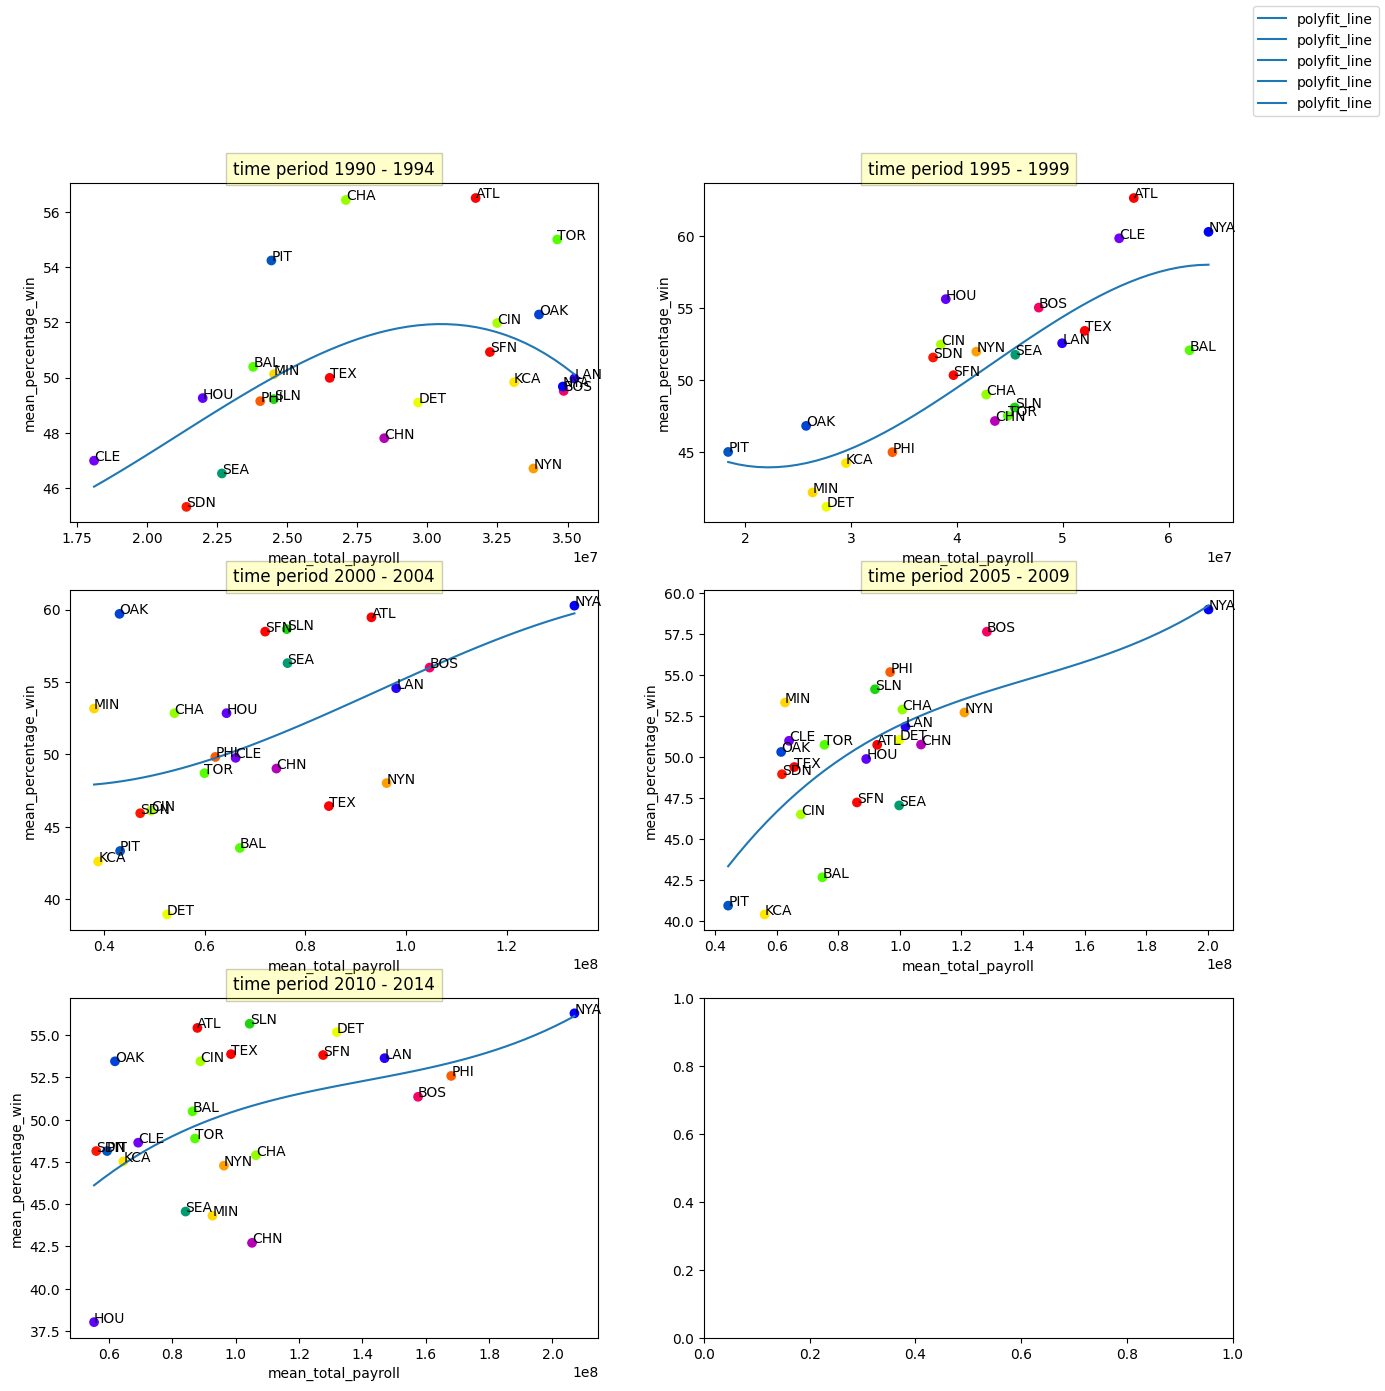

In [85]:
# plot the graph between mean total payroll and mean percentage wins for each given time period.

fig , axes = plt.subplots (nrows = 3, ncols = 2, figsize =(15 , 15))
box = dict(facecolor='yellow', pad=5, alpha=0.2)
count = 0
bins = [bin1, bin2, bin3, bin4, bin5]
for rows in range(3):
    for columns in range(2):
        if count == 5:
            break
        a = bins[count].total_payroll
        b = bins[count].percentage_win
        z1 = np.polyfit(a, b, 3) # regression line for given datasets
        p1 = np.poly1d(z1)
        axes[rows,columns].scatter(a, b, c = np.arange(1,24), cmap = "prism")
        axes[rows,columns].plot(np.linspace(a.min(),a.max(),50), p1(np.linspace(a.min(),a.max(),50)), label="polyfit_line")
        axes[rows,columns].set_title(f"time period {1990 + count*5} - {1994+ count*5}", bbox=box)
        axes[rows,columns].set_xlabel("mean_total_payroll")
        axes[rows,columns].set_ylabel("mean_percentage_win")

        for y in range(23):
            axes[rows,columns].annotate(bins[count].teamID[y], (a[y], b[y])) # annotate each point using teamID
        count+=1
fig.legend();

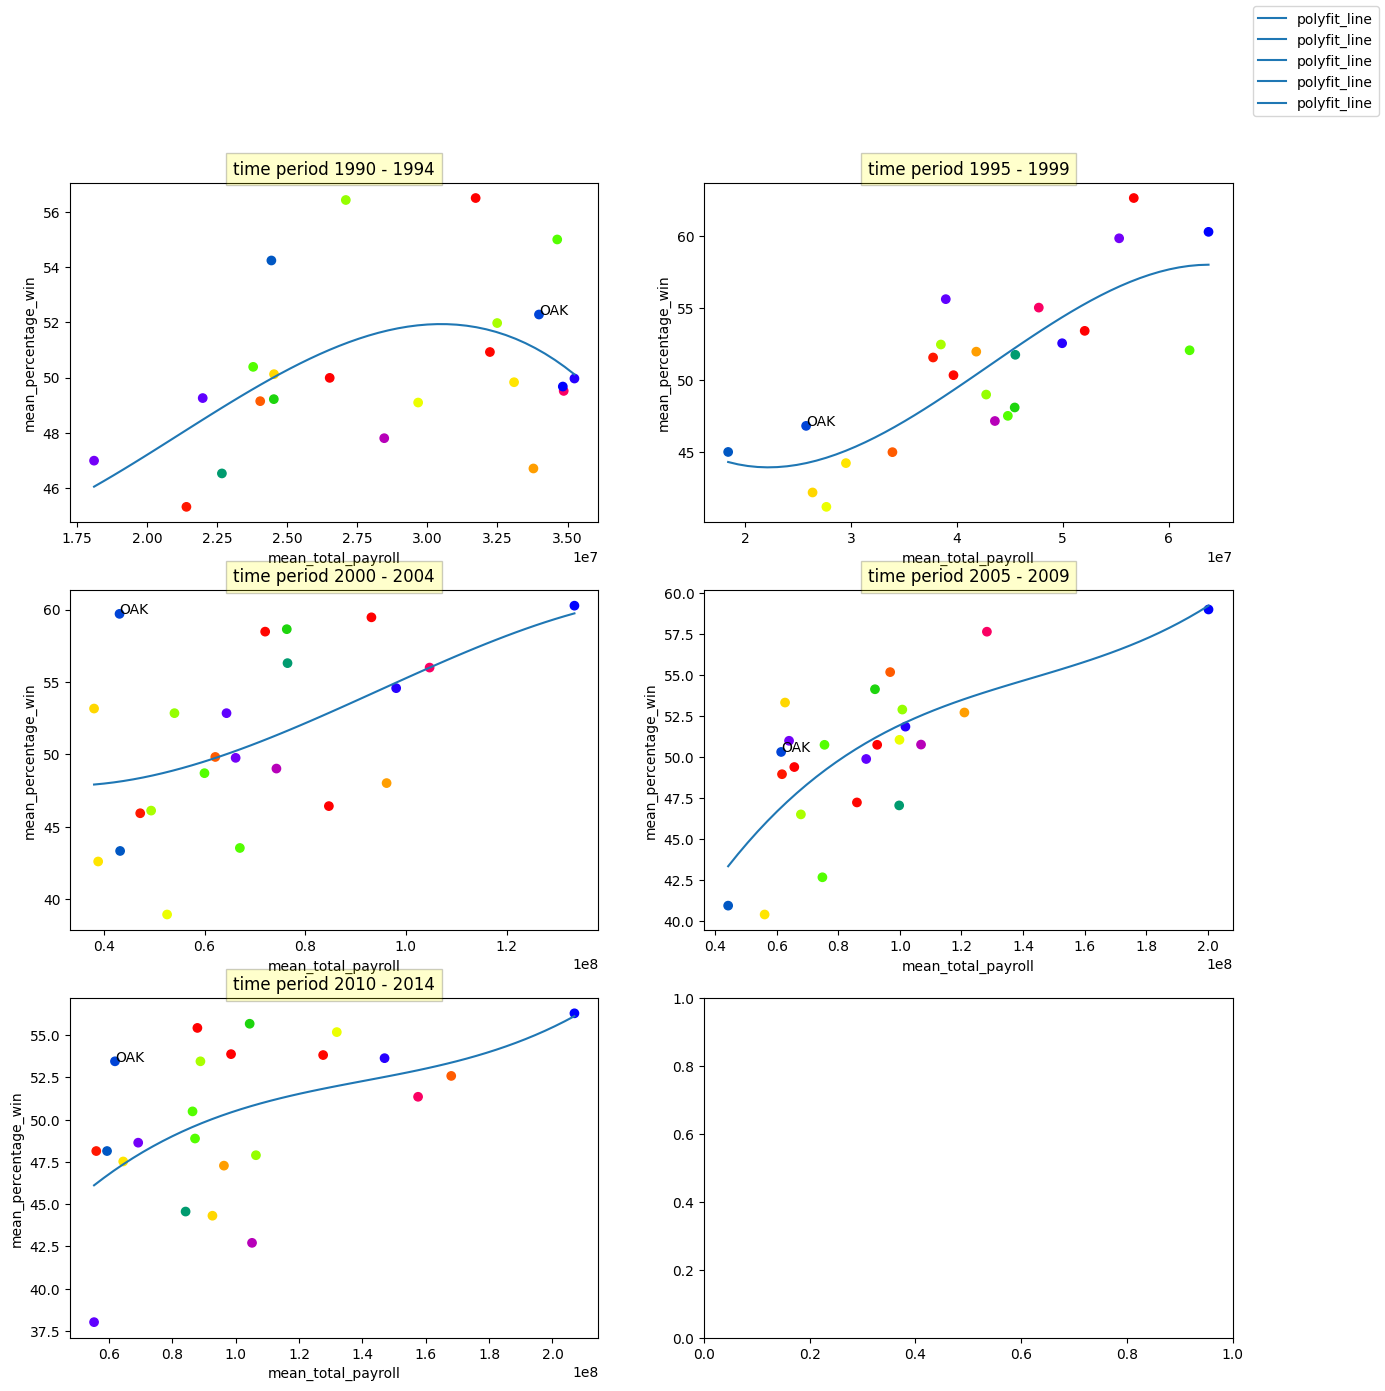

In [86]:
# same plot as above but highlight the only "OAK" team for easy interpretation.

fig , axes = plt.subplots (nrows = 3, ncols = 2, figsize =(15 , 15))
box = dict(facecolor='yellow', pad=5, alpha=0.2)
count = 0
bins = [bin1, bin2, bin3, bin4, bin5]
for rows in range(3):
    for columns in range(2):
        if count == 5:
            break
        a = bins[count].total_payroll
        b = bins[count].percentage_win
        z1 = np.polyfit(a, b, 3)
        p1 = np.poly1d(z1)
        axes[rows,columns].scatter(a, b, c = np.arange(1,24), cmap = "prism")
        axes[rows,columns].plot(np.linspace(a.min(),a.max(),50), p1(np.linspace(a.min(),a.max(),50)), label="polyfit_line")
        axes[rows,columns].set_title(f"time period {1990 + count*5} - {1994+ count*5}", bbox=box)
        axes[rows,columns].set_xlabel("mean_total_payroll")
        axes[rows,columns].set_ylabel("mean_percentage_win")

        for y in range(23):
            if bins[count].teamID[y] == "OAK":
                axes[rows,columns].annotate(bins[count].teamID[y], (a[y], b[y]))
        count+=1
fig.legend();

In [87]:
# Analysis and the answer of Question 2.

# Now, we can observe that nearly half of the teams get the same payroll but perform not as expected wins in games.
# For instance, the team NYA has a higher payroll compared to other teams. In return, they had a higher percentage of wins in games.
# Now lets talk about team "OAK" I made another plot that highlights only the team "OAK" for easy interpretation.
# During the period from 2000 to 2004, the team performed exceptionally well, winning approximately 60% of their games and while maintaining a relatively similar payroll.
# And rest of the time maintaining the average of 50 % win ratio with varied payroll.


In [104]:
## PART 3 Data Transformation

In [90]:
# problem 5
# compute the standarized payroll using standarize formula.
# made a new colomn name stadarized_payroll for easy interpretation of data from plots.

standarized_payroll = []
list_of_payroll=[]
sd = []
mean_payroll = final_result.loc[:, ["yearID", "total_payroll", "percentage_win"]].groupby("yearID").mean().reset_index()["total_payroll"]

In [91]:
# implement the logic for standarized the payroll by each year.

temp = 0
count = 1
i = 0
for j in range(1, 576):
    if j %23 == 0:
        list_of_payroll.append(final_result.loc[i:j-1, "total_payroll"])
        i = j

for x in range(25):
    sd.append(np.std(list_of_payroll[x]))

count = 1
i = 0
for j in list(final_result.loc[:, ["total_payroll"]].iloc(1))[0]:

    standarized_payroll.append((j - mean_payroll[i])/sd[i])
    if count % 23 == 0:
        i+=1

    count+=1

In [92]:
final_result["standarized_payroll"] = standarized_payroll

/var/folders/p6/vndmwsg51dz3c3wg9s0xj2g00000gn/T/ipykernel_52595/4155210584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_result["standarized_payroll"] = standarized_payroll


In [93]:
final_result

,level_0,index,yearID,teamID,total_payroll,total_game,total_win,percentage_win,standarized_payroll
0,0,130,1990,ATL,14555501.0,162,65,40.123457,-0.590969
1,1,131,1990,BAL,9680084.0,162,76,46.913580,-1.888329
2,2,132,1990,BOS,20558333.0,162,88,54.320988,1.006400
3,4,134,1990,CHA,9491500.0,162,94,58.024691,-1.938512
4,5,135,1990,CHN,13624000.0,162,77,47.530864,-0.838843
...,...,...,...,...,...,...,...,...,...
570,721,851,2014,SEA,92531100.0,162,87,53.703704,-0.391344
571,722,852,2014,SFN,163510167.0,162,88,54.320988,1.201378
572,723,853,2014,SLN,120693000.0,162,90,55.555556,0.240590
573,725,855,2014,TEX,112255059.0,162,67,41.358025,0.051248


In [94]:
# divide the time periods into 5 parts using the same technique i used above.
# I cannot use the previous one because the new feature standarized payroll was not there.

bin1 = final_result.loc[0:114, :][["teamID", "total_payroll", "percentage_win","standarized_payroll"]].groupby(by="teamID", ).mean().reset_index()
bin2 = final_result.loc[115:229, :][["teamID", "total_payroll", "percentage_win","standarized_payroll"]].groupby(by="teamID", ).mean().reset_index()
bin3 = final_result.loc[230:344, :][["teamID", "total_payroll", "percentage_win","standarized_payroll"]].groupby(by="teamID", ).mean().reset_index()
bin4 = final_result.loc[345:459, :][["teamID", "total_payroll", "percentage_win","standarized_payroll"]].groupby(by="teamID", ).mean().reset_index()
bin5 = final_result.loc[460:575, :][["teamID", "total_payroll", "percentage_win","standarized_payroll"]].groupby(by="teamID", ).mean().reset_index()

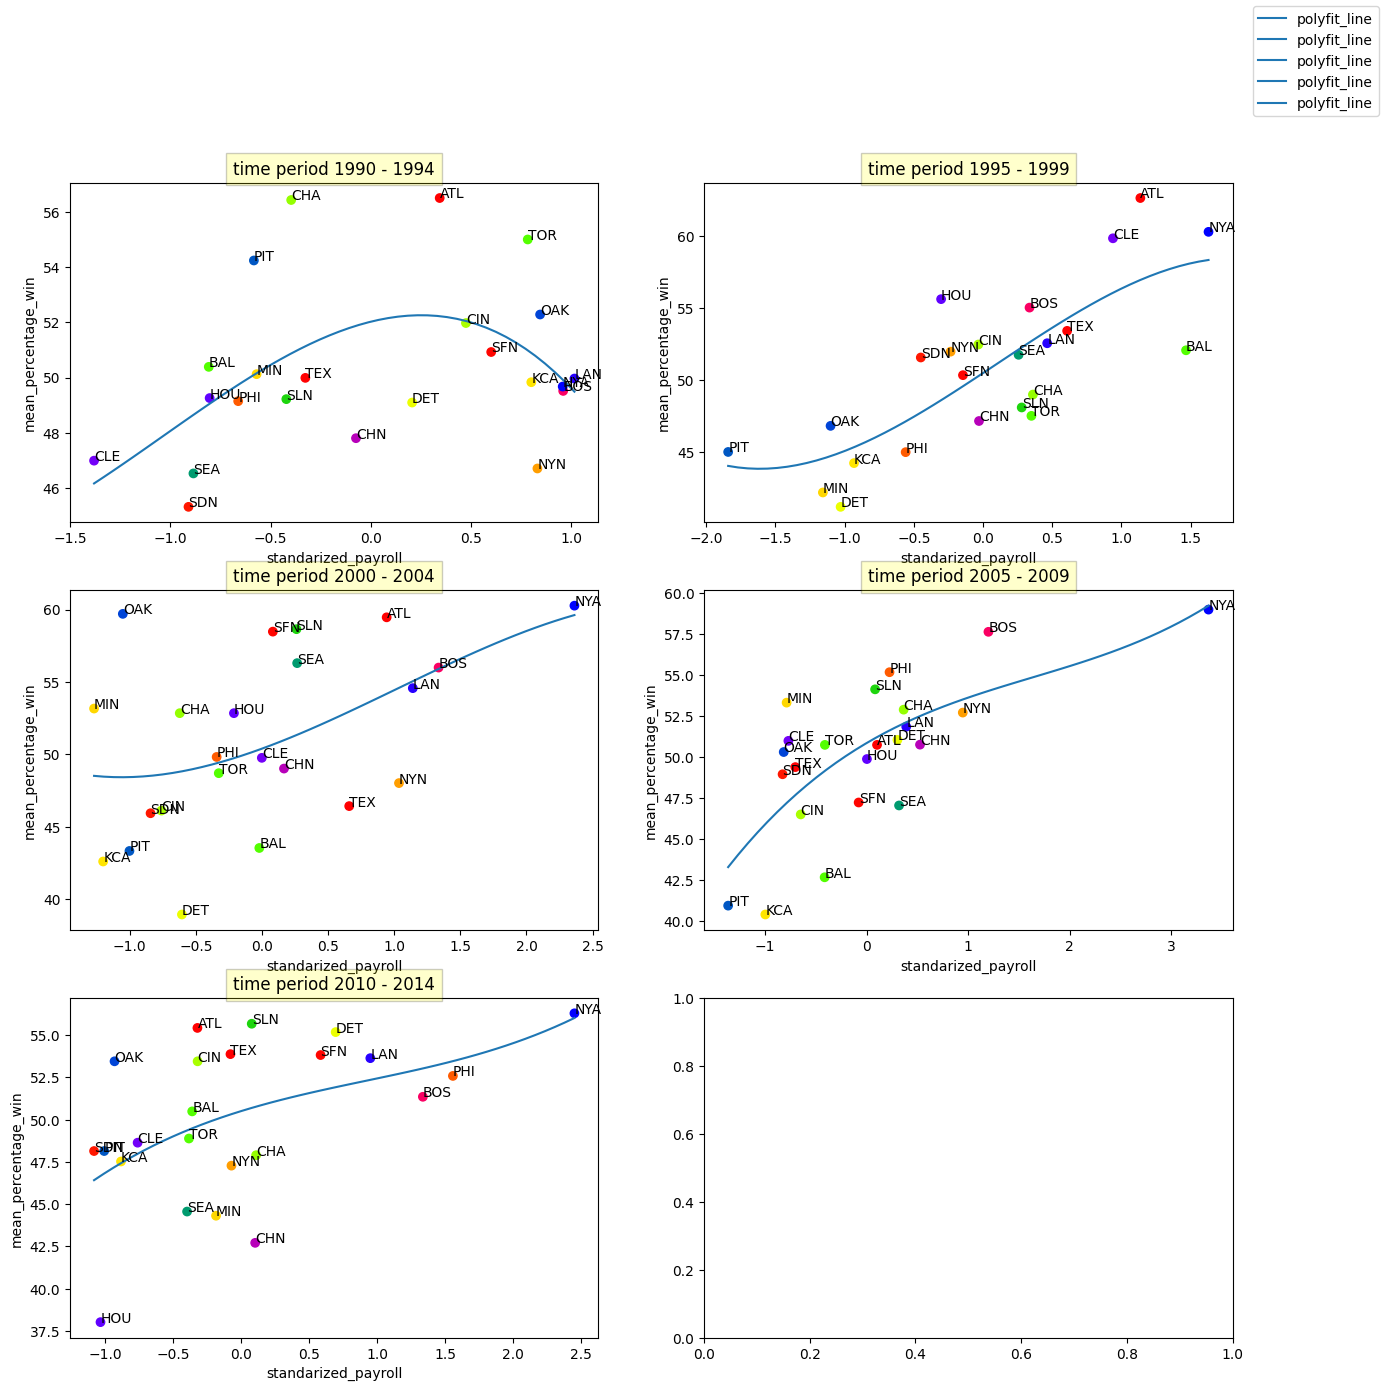

In [95]:
# Plot the graph between standarized payroll and mean percentage wins for each given time period.

fig , axes = plt.subplots (nrows = 3, ncols = 2, figsize =(15 , 15))
box = dict(facecolor='yellow', pad=5, alpha=0.2)
count = 0
bins = [bin1, bin2, bin3, bin4, bin5]
for rows in range(3):
    for columns in range(2):
        if count == 5:
            break
        a = bins[count].standarized_payroll
        b = bins[count].percentage_win
        z1 = np.polyfit(a, b, 3)
        p1 = np.poly1d(z1)
        axes[rows,columns].scatter(a, b, c = np.arange(1,24), cmap = "prism")
        axes[rows,columns].plot(np.linspace(a.min(),a.max(),50), p1(np.linspace(a.min(),a.max(),50)), label="polyfit_line")
        axes[rows,columns].set_title(f"time period {1990 + count*5} - {1994+ count*5}", bbox=box)
        axes[rows,columns].set_xlabel("standarized_payroll")
        axes[rows,columns].set_ylabel("mean_percentage_win")

        for y in range(23):
            axes[rows,columns].annotate(bins[count].teamID[y], (bins[count].standarized_payroll[y], bins[count].percentage_win[y]))
        count+=1
fig.legend();

In [96]:
# Analysis and Answer of Que 3

# now we can say that half of the teams get paid more than the average payroll and had some high probability of win and vice versa
# and we can aslo say that over time payroll was also increased.
# Plots from problem 4 we cannot see the mean payroll for each time period so we cannot make decisions that how much of teams get paid more than the average and get paid less than the average
# now we can also see the outlier point or we can say exceptional gameplay of the team than the rest of the teams

linear regression line:  
2.613 x + 50.46


Text(0.5, 0, 'standarized_payroll')

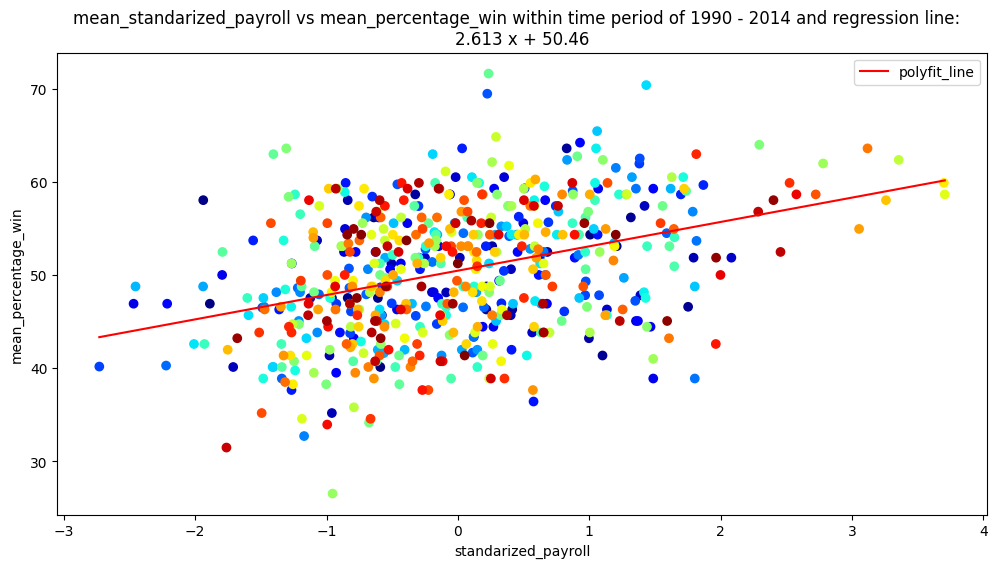

In [97]:
# plot the graph between standarized payroll and mean percentage wins for each given time period.

s = final_result
z = np.polyfit(s.standarized_payroll, s.percentage_win,1)
p = np.poly1d(z)
print(f"linear regression line: {p}")

x = s.standarized_payroll
y = s.percentage_win

i = np.linspace(x.min(), x.max(), 50)
plt.figure(figsize=(12,6))
plt.scatter(x, y, c = np.arange(1,576), cmap='jet')
# k = 0
# for a, b in zip(x,y):
#     plt.annotate(s.teamID[k], (a ,b))
#     k+=1

plt.plot(i, p(i), color = "r", label="polyfit_line")
plt.title(f"mean_standarized_payroll vs mean_percentage_win within time period of {min(s.yearID)} - {max(s.yearID)} and regression line: {p}")
plt.legend()
# plt.yticks(y)
plt.ylabel("mean_percentage_win")
plt.xlabel("standarized_payroll")


In [98]:
# From these observations we can calculate the expected win percentage for team i in year j as:
# expected_win_perc = 50.46 + 2.613 * standarized_payroll

In [99]:
p

poly1d([ 2.61312806, 50.45989562])

In [100]:
# Now compute the another term efficiency for easy interpretation and the term is self explainatory. Efficency = Win_percentage - expected_win_percentage using the above regression line equation.
efficiency = []
for x in range(575):
    efficiency.append(final_result.percentage_win[x] - (50.45989 + (2.61312 * final_result.standarized_payroll[x])))

In [101]:
# update the dataframe

final_result["efficiency"] = efficiency

/var/folders/p6/vndmwsg51dz3c3wg9s0xj2g00000gn/T/ipykernel_52595/750695723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_result["efficiency"] = efficiency


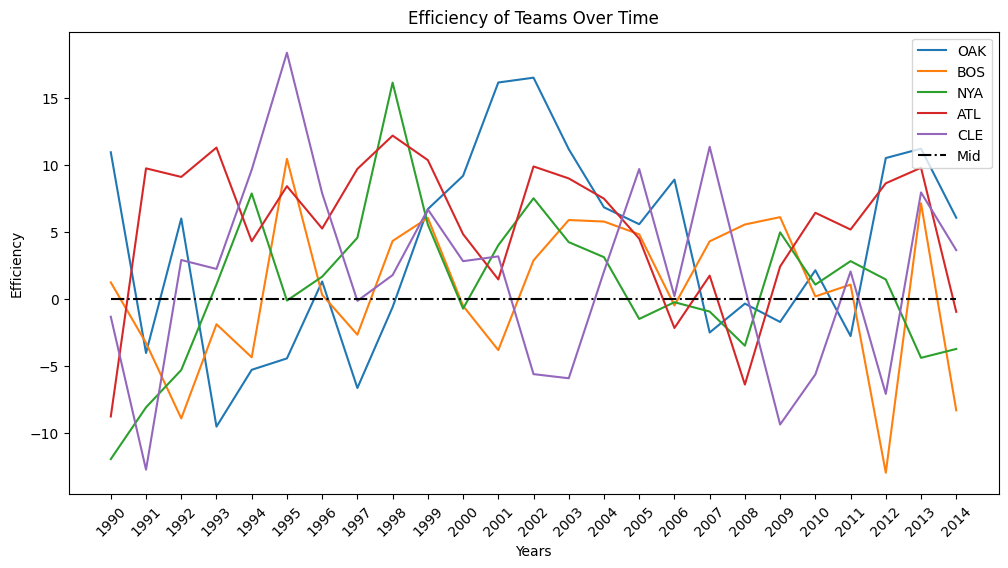

In [102]:
# plot of efficency over time. Here I took only a good set of teams to plot are Oakland(OAK), the New York Yankees(NYA), Boston(BOS), Atlanta(ATL), and Cleveland Indians(CLE).

plt.figure(figsize=(12,6))
plt.plot(final_result[final_result["teamID"] == "OAK"].yearID, final_result[final_result["teamID"] == "OAK"].efficiency, label="OAK")
plt.plot(final_result[final_result["teamID"] == "BOS"].yearID, final_result[final_result["teamID"] == "BOS"].efficiency, label="BOS")
plt.plot(final_result[final_result["teamID"] == "NYA"].yearID, final_result[final_result["teamID"] == "NYA"].efficiency, label="NYA")
plt.plot(final_result[final_result["teamID"] == "ATL"].yearID, final_result[final_result["teamID"] == "ATL"].efficiency, label="ATL")
plt.plot(final_result[final_result["teamID"] == "CLE"].yearID, final_result[final_result["teamID"] == "CLE"].efficiency, label="CLE")
plt.plot(final_result[final_result["teamID"] == "CLE"].yearID, np.zeros(np.shape(final_result[final_result["teamID"] == "CLE"].yearID)), label="Mid", linestyle = "-.", color = "black")
plt.xlabel("Years")
plt.ylabel("Efficiency")
plt.xticks(final_result[final_result["teamID"] == "OAK"].yearID,rotation=45)
plt.title("Efficiency of Teams Over Time")
plt.legend(loc = 1);

In [103]:
# Efficency plot told you the whole scenario like which team made money over time.
# Comparing OAK's Efficiency to Other Teams During the Moneyball Period

# Based on the provided plots and analysis, here's what we can learn about OAK's efficiency during the Moneyball period:

# 1. OAK's Performance Relative to Payroll:
# - During the Moneyball era (roughly the early to mid-2000s),
#   the plots suggest that OAK was able to achieve a relatively high level of efficiency compared to other teams.
#   This means that they were able to win a higher percentage of games while having a comparatively lower payroll.

# 2. OAK's Efficiency Over Time:
# - The plot highlighting OAK's efficiency over time (the one you specifically requested) helps to illustrate its performance relative to the regression line.
# - Points above the regression line represent periods where OAK outperformed expectations given its payroll.
#   We can observe that OAK had periods where they were highly efficient in terms of converting payroll into wins.

# 3. Context and Comparison:
# - Comparing OAK's efficiency to other teams, particularly NYA (Yankees) who often had much higher payrolls,
#   highlights the effectiveness of OAK's approach.
#   It demonstrates how Oakland was able to achieve success by adopting a strategy focused on undervalued players and shrewd management.

# 4. Limitations and Considerations:
# - The efficiency measure used here is just one perspective.
#   Other metrics could be considered to gain a more comprehensive understanding of team performance.
# - Context matters: Factors beyond payroll (like player development, coaching, and skills) can influence team success.
#   We should consider these factors while interpreting efficiency.

# Overall Assessment of OAK's Efficiency During the Moneyball Period:
# - The analysis suggests that OAK was notably efficient during the Moneyball era.
#   They managed to gain a competitive edge by strategically allocating their resources,
#   which led to winning a higher percentage of games given their payroll.
# - The plots provide strong evidence that the Moneyball era's strategy was successful for the Oakland Athletics.

# - The main purpose of this plot is can clearly see the efficency of the teams but the plots from the que 2 and que 3,
#   we have to first see the payroll and after their performace so it little bit messy in our minds which team is better perfoming respect to payroll and performance.